# Rule Based Sentiment Analysis Using NLTK Vader

### Importing all the relevant libraries

In [0]:
import tweepy
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from textblob import TextBlob
import re

Twitter API authentication

In [0]:
#Twitter API Authentication Variables
consumer_key = 'xkGSBh0xZUCz9Te9L4sF8d6bz'
consumer_secret = 'mUIFYKL6X7ClNRJfJEPJwfsqwALzSFozmHG4SU5qSSbWGP1QCO'
access_token = '1015135124126564352-fVo14evXHx9mMiPAhGDMOaokAU8jmq'
access_token_secret = 'tXsUGIj5fMas0DSd4d3dRGu8Mn9kiF5CequsaYKLRvuvE'

###Retrieving Tweets

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('GalaxyS10 US', count=200)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head())


print(tweets[0].created_at)


,Tweets
0,RT @SamsungMobileUS: #GalaxyS10 wallpapers are...
1,RT @SamsungMobileUS: #GalaxyS10 wallpapers are...
2,RT @SamsungMobileUS: #GalaxyS10 wallpapers are...
3,RT @SamsungMobileUS: #GalaxyS10 wallpapers are...
4,RT @SamsungMobileUS: #GalaxyS10 wallpapers are...


2019-03-16 09:52:25


### Cleaning the tweet. Removing all emojis and Special characters

In [0]:
#cleaning the tweet
k=0
for tweet in data['Tweets']:
  data.iloc[k,0]=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  k=k+1

data.head()

### Natural Language Toolkit 
Vader for Sentiment analysis

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Performing Rule Based Sentiment Analysis and Finding Polarities

In [7]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss) 
  
se = pd.Series(listy)
data['polarity'] = se.values

data.head()

,Tweets,polarity
0,RT GalaxyS10 wallpapers are a thing Big shouto...,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp..."
1,RT GalaxyS10 wallpapers are a thing Big shouto...,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp..."
2,RT GalaxyS10 wallpapers are a thing Big shouto...,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp..."
3,RT GalaxyS10 wallpapers are a thing Big shouto...,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp..."
4,RT GalaxyS10 wallpapers are a thing Big shouto...,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp..."


In [8]:
data.shape

(100, 2)

### Finding mean and Plotting the results

In [0]:
mean_pos=np.mean(data.iloc[0,1]['pos'])
mean_neg=np.mean(data.iloc[0,1]['neg'])
mean_neu=np.mean(data.iloc[0,1]['neu'])
mean_compound=np.mean(data.iloc[0,1]['compound'])

In [0]:
sns.set(style='whitegrid')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


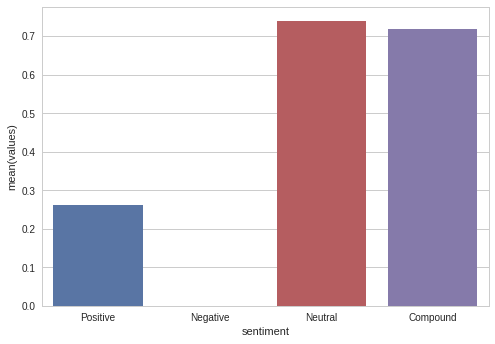

In [11]:
snt={'sentiment':["Positive","Negative","Neutral","Compound"],'values':[mean_pos,mean_neg,mean_neu,mean_compound]}
df_mean=pd.DataFrame.from_dict(data=snt)
sns.barplot(x="sentiment",y="values",data=df_mean)